# Graphing data
Graphing different things within the data

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import glob
import global_settings as gs

os.getcwd()
output_location = 'G:/honours/outputs'

## 1. Plotting NMAD v Template

In [2]:
test_directories_list = [f'{output_location}/cdfs/individual_main/individual_main_data.csv',
                         f'{output_location}/cdfs/individual/individual_data.csv',
                         f'{output_location}/cdfs/individual_main_0.05/individual_main_0.05_data.csv',
                         f'{output_location}/cdfs/individual_lacy_0.05/individual_lacy_0.05_data.csv',
                         f'{output_location}/cdfs/individual_lacy_0.05_obs/individual_lacy_0.05_obs_data.csv',
                         f'{output_location}/cdfs/individual_main_agn_above_0.1/individual_main_agn_above_0.1_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.4/individual_only_agn_0.4_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.4_obs/individual_only_agn_0.4_obs_data.csv',
                         f'{output_location}/cdfs/individual_lacy2_0.05/individual_lacy2_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.0to0.1_0.05/individual_bin0.0to0.1_0.05_data.csv',
                         f'{output_location}/cdfs/individual_donley_all_0.05/individual_donley_all_0.05_data.csv',
                         f'{output_location}/combined/individual_combined_0.05_2/individual_combined_0.05_2_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['individual_rest', 'individual_obs', 'individual_main_0.05', 'individual_lacy_0.05', 'individual_lacy_0.05_obs', 'individual_main_agn_above_0.1', 'individual_only_agn_0.4', 'individual_only_agn_0.4_obs', 'individual_lacy2_0.05', 'bin0.0to0.1_0.05', 'donley_all_0.05', 'individual_combined_0.05_2'] # List of names for each test directory

no_template_nmad_list = [0.013429984, 0.013429984, 0.019863030992036, 0.0323514264448324, 0.0323514264448324, 0.0287771466353268, 0.0555815201454613, 0.0555815201454613, 0.03155071491144223, 0.01800493236298936, 0.049616638403152315, 0.019378955261875105] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < 0.0]}')

Reductive Templates in individual_rest: 
    template_order  individual_rest
11              34        -0.000035
Reductive Templates in individual_obs: 
    template_order  individual_rest  individual_obs
5               15         0.000991       -0.000675
9                6         0.001259       -0.000550
14              35         0.000311       -0.000207
21              16         0.001566       -0.000034
37              12         0.001027       -0.000370
Reductive Templates in individual_main_0.05: 
Empty DataFrame
Columns: [template_order, individual_rest, individual_obs, individual_main_0.05]
Index: []
Reductive Templates in individual_lacy_0.05: 
    template_order  individual_rest  individual_obs  individual_main_0.05  \
1                1         0.001124        0.000034              0.002084   
8                8         0.001192        0.001028              0.002010   
9                6         0.001259       -0.000550              0.001723   
11              34        -0

In [3]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present
len(nmad_plot.columns)

13

Text(40.347222222222214, 0.5, 'NMAD - NMAD without templates')

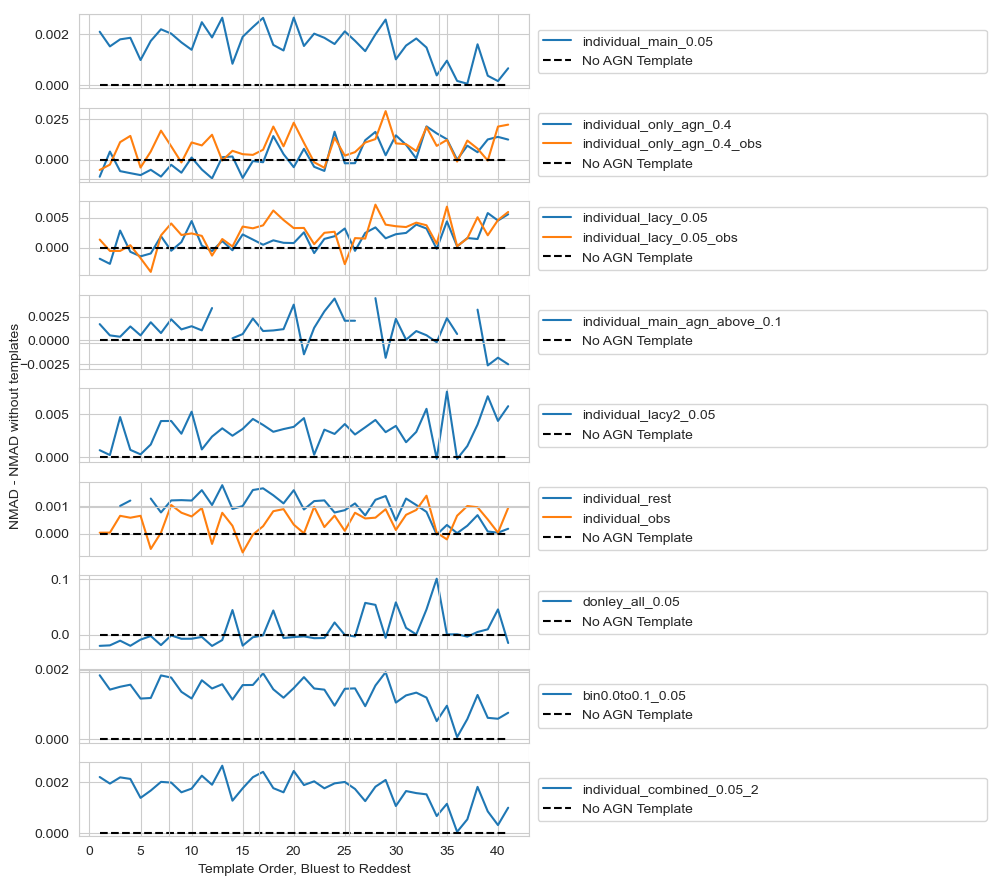

In [4]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)


Same Graph with only AGN Bins

In [5]:
test_directories_list = [f'{output_location}/cdfs/individual_bin0.0to0.1_0.05/individual_bin0.0to0.1_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.1to0.2_0.05/individual_bin0.1to0.2_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.2to0.3_0.05/individual_bin0.2to0.3_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.3to0.4_0.05/individual_bin0.3to0.4_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.4to0.5_0.05/individual_bin0.4to0.5_0.05_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.5_0.05/individual_only_agn_0.5_0.05_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['individual_bin0.0to0.1', 'individual_bin0.1to0.2', 'individual_bin0.2to0.3', 'individual_bin0.3to0.4', 'individual_bin0.4to0.5', 'individual_only_agn_0.5'] # List of names for each test directory

no_template_nmad_list = [0.018004958, 0.018259684, 0.0254315565614942, 0.0359537225669563, 0.0249133578745259, 0.142984052745047] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < 0.0]}')

Reductive Templates in individual_bin0.0to0.1: 
Empty DataFrame
Columns: [template_order, individual_bin0.0to0.1]
Index: []
Reductive Templates in individual_bin0.1to0.2: 
    template_order  individual_bin0.0to0.1  individual_bin0.1to0.2
7               39                0.000619               -0.000139
10              41                0.000765               -0.000042
Reductive Templates in individual_bin0.2to0.3: 
    template_order  individual_bin0.0to0.1  individual_bin0.1to0.2  \
0               40                0.000593                0.000409   
7               39                0.000619               -0.000139   
10              41                0.000765               -0.000042   
14              35                0.000966                0.000186   
25              14                0.001142                0.003885   
26              33                0.001199                0.002568   
38              37                0.000584                0.000759   

    individual_bin

Text(40.347222222222214, 0.5, 'NMAD - NMAD without templates')

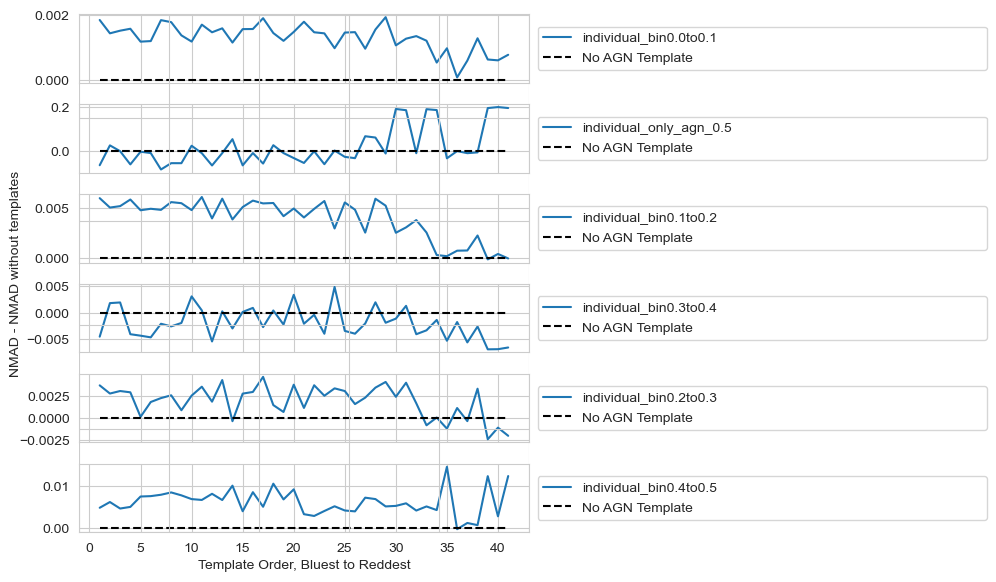

In [6]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)

Same Graph with each field

In [7]:
test_directories_list = [f'{output_location}/cdfs/individual_donley_main_0.05/individual_donley_main_0.05_data.csv',
                         f'{output_location}/cosmos/individual_donley_main_0.05/individual_donley_main_0.05_data.csv',
                         f'{output_location}/uds/individual_donley_main_0.05/individual_donley_main_0.05_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['cdfs', 'cosmos', 'uds'] # List of names for each test directory

no_template_nmad_list = [0.0500409075913965,0.0181856141740006,0.01547076554904] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < -0.05 * no_template_nmad_list[test_name]]}')

Reductive Templates in cdfs: 
    template_order      cdfs
1                1 -0.021017
2                7 -0.019622
5               15 -0.020621
9                6 -0.003147
10              41 -0.015870
12               2 -0.020108
13              21 -0.003768
15              22 -0.007067
16              23 -0.006780
19               9 -0.008157
21              16 -0.005364
22              11 -0.004835
23              19 -0.006741
27               5 -0.009662
30              26 -0.004022
32              10 -0.008061
33               4 -0.020893
34              20 -0.005072
35               3 -0.011614
36              29 -0.006494
37              12 -0.021151
38              37 -0.004281
39              13 -0.010466
Reductive Templates in cosmos: 
Empty DataFrame
Columns: [template_order, cdfs, cosmos]
Index: []
Reductive Templates in uds: 
Empty DataFrame
Columns: [template_order, cdfs, cosmos, uds]
Index: []


Text(40.347222222222214, 0.5, 'NMAD - NMAD without templates')

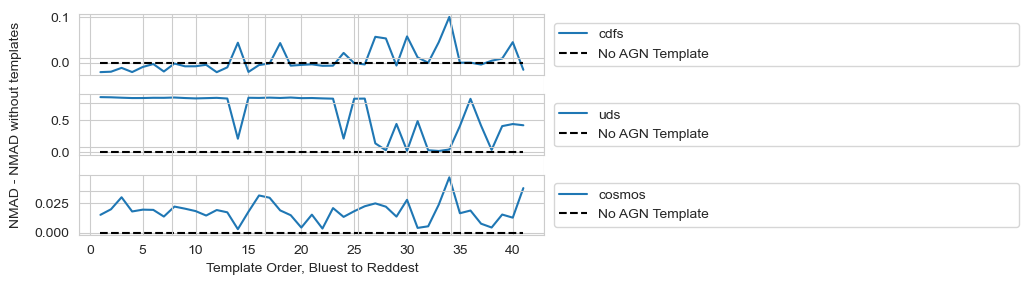

In [8]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)

## 2. Surface Plot of residual for each template in test

In [24]:
# Setup the Same as Template Auto reload
os.getcwd()
test_title = 'individual_lacy_main_0.05' # title of the test, eg. 1,2, A, B, Initial.
field = 'cdfs'
id_key = 'lacy' # normal, high or low
use_galaxy_templates = True
params = {}
params["Z_STEP"] = 0.05

#opening ZFOURGE data
id_key_dict = {
    'normal': f'inputs/alternate_catalogues/{field}.normal.cat',
    'fraction0.0to0.1': f'inputs/alternate_catalogues/{field}.fraction.bin0.0to0.1.cat',
    'fraction0.1to0.2': f'inputs/alternate_catalogues/{field}.fraction.bin0.1to0.2.cat',
    'fraction0.2to0.3': f'inputs/alternate_catalogues/{field}.fraction.bin0.2to0.3.cat',
    'fraction0.3to0.4': f'inputs/alternate_catalogues/{field}.fraction.bin0.3to0.4.cat',
    'fraction0.4to0.5': f'inputs/alternate_catalogues/{field}.fraction.bin0.4to0.5.cat',
    'ir_agn': f'inputs/alternate_catalogues/{field}.ir_agn.cat',
    'radio_agn': f'inputs/alternate_catalogues/{field}.radio_agn.cat',
    'xray_agn': f'inputs/alternate_catalogues/{field}.xray_agn.cat',
    'only_agn_0.4': f'inputs/alternate_catalogues/{field}.only_agn_above_0.4.cat',
    'only_agn_0.5': f'inputs/alternate_catalogues/{field}.only_agn_above_0.5.cat',
    'lacy': f'inputs/alternate_catalogues/{field}.lacy_wedge.cat',
    'donley': f'inputs/alternate_catalogues/{field}.donley_wedge.cat',
    'useflag': f'inputs/alternate_catalogues/{field}.useflag.cat'
}

main_cat = pd.read_csv(id_key_dict[id_key]) # get the catalogue for the id_key
main_cat.to_csv('inputs/eazy_graph.cat', index=False) # create a new catalogue, allows for change to be made in this cell

#Setting up the main catalogue
main = pd.read_csv('inputs/eazy_graph.cat', sep=" ", comment="#", header=None, skipinitialspace=True) # opening cut cat, and adjusting it
headers = pd.read_csv('inputs/eazy_graph.cat', sep=" ", header=None, nrows=1).iloc[0]
headers = headers[1:]
main.columns = headers
agn_per_dir = f'inputs/{field}_agn_frac.txt' # file with AGN fractions for each object, prepared in catalogue_prepare.ipynb
all_bayes = pd.read_csv(agn_per_dir, sep="\s+", comment='#')

has_fraction = 'bayes.agn.fracAGN' in main.columns
if not has_fraction:
    main = pd.merge(main, all_bayes, on='id', how='left') # AGN fraction for each object

agn_dir = 'templates/hlsp_agnsedatlas_rest/' # dir with all agn templates
agn_temp_all = os.listdir(agn_dir)

# Loading values that are present in catalog, done at the end of EAZY_test.py
columns_to_drop = ['id', 'phot_redshift', 'chi2']
spec_data = pd.read_csv(f'{output_location}/{field}/spec_data.csv')

reindex_list = list(main['id'])
reindex_val = [x - 1 for x in reindex_list] # cat is indexed from 1, not 0
reindex_sel = spec_data['id'].isin(list(reindex_val)) # -1 from each value in the main cat, and use it as a mask for the data
spec_data = spec_data[reindex_sel].reset_index(drop=True)

filter_data = pd.read_csv(f'{output_location}/{field}/filter_data.csv')
flux_data = pd.read_csv(f'{output_location}/{field}/flux_data.csv')

filter_error = flux_data.filter(regex='^e_')
filter_error = filter_error[reindex_sel].reset_index(drop=True)
filter_flux = flux_data.filter(regex='^f_')
filter_flux = filter_flux[reindex_sel].reset_index(drop=True)

In [5]:
os.getcwd()
test_title = 'individual_lacy_main_0.05' # title of the test, eg. 1,2, A, B, Initial.
field = 'cdfs'
id_key = 'lacy' # normal, high or low
use_galaxy_templates = True
params = {}
params["Z_STEP"] = 0.05
params['TEMPLATE_COMBOS'] = 'a'
output_location = 'G:/honours/outputs'

#opening data keys
id_key_dict = gs.get_id_dict(field)
template_key = 'atlas_rest'
template_key_dict = gs.get_template_dict()
agn_dir =  template_key_dict[template_key] # dir with all agn templates
agn_temp_all = os.listdir(agn_dir)


#Setting up the main catalogue
main_cat = pd.read_csv(id_key_dict[id_key]) # get the catalogue for the id_key
main_cat.to_csv('inputs/eazy_reload.cat', index=False) # create a new catalogue, allows for change to be made in this cell

main = pd.read_csv('inputs/eazy_reload.cat', sep=" ", comment="#", header=None, skipinitialspace=True) # opening cut cat, and adjusting it
headers = pd.read_csv('inputs/eazy_reload.cat', sep=" ", header=None, nrows=1).iloc[0]
headers = headers[1:]
main.columns = headers
agn_per_dir = f'inputs/{field}_agn_frac.txt' # file with AGN fractions for each object, prepared in catalogue_prepare.ipynb
all_bayes = pd.read_csv(agn_per_dir, sep="\s+", comment='#')

has_fraction = 'bayes.agn.fracAGN' in main.columns
if not has_fraction:
    main = pd.merge(main, all_bayes, on='id', how='left') # AGN fraction for each object

# Loading values that are present in catalog, done at the end of EAZY_test.py
columns_to_drop = ['id', 'phot_redshift', 'chi2']
spec_data = pd.read_csv(f'{output_location}/{field}/spec_data.csv')

reindex_list = list(main['id'])
reindex_val = [x - 1 for x in reindex_list] # cat is indexed from 1, not 0
reindex_sel = spec_data['id'].isin(list(reindex_val))
spec_data = spec_data[reindex_sel].reset_index(drop=True)

filter_data = pd.read_csv(f'{output_location}/{field}/filter_data.csv')
flux_data = pd.read_csv(f'{output_location}/{field}/flux_data.csv')

filter_error = flux_data.filter(regex='^e_')
filter_error = filter_error[reindex_sel].reset_index(drop=True)
filter_flux = flux_data.filter(regex='^f_')
filter_flux = filter_flux[reindex_sel].reset_index(drop=True)

In [7]:
#check_df = pd.read_csv(f'{output_location}/{field}/{test_title}/induvidual_data_{field}_{id_key}_{params["Z_STEP"]}_[0]_{use_galaxy_templates}.csv')
check_df = gs.load_individual(output_location, field, test_title, id_key, template_key, [0], use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS'])
if len(main) != len(check_df):
    print('Lengths of the main catalog and the test catalog do not match')
    print(f'Main: {len(main)}, Test: {len(check_df)}')
    print('The next cell will not work as intended')
else:
    print('Lengths of the main catalog and the test catalog match')

Old Saving Structure
Lengths of the main catalog and the test catalog match


C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\1158668939.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy() This was a warning, to be fixed later

In [9]:
residual_df = pd.DataFrame()
for template in range(len(agn_temp_all)):
    agn_sed = [template]

    individual_df = gs.load_individual(output_location, field, test_title, id_key, template_key, agn_sed, use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS'])

    # to maintain consitency with EAZY Test, we need to load the data in the same way
    class self_load:
        def __init__(self, idx, ZSPEC, ZBEST, fnu, efnu, efmodel, pivot, zbest):
            self.idx = np.array(main['id'].index)
            self.ZSPEC = np.array(spec_data['zspec'])
            self.fnu = np.array(filter_flux)
            self.efnu = np.array(filter_error)
            self.fmodel = np.array(individual_df.drop(columns=columns_to_drop))
            self.pivot = np.array(filter_data['pivot'])
            self.zbest = np.array(individual_df['phot_redshift'])

    self=self_load(0,0,0,0,0,0,0,0)

    #limit the no of objects to those that are present in all bands, and have a positive redshift
    flux_observed = []
    flux_residual_objects = []

    # Filter section
    filter_attendance = 39 # can miss 1 filter and still be selected
    for i in range(len(self.fnu)):
        if self.ZSPEC[i] < 0.001:
            continue
        if sum(self.fnu[i] <= 0) > filter_attendance:
            continue # don't use objects where more than filter attendance filters are missing (eg. if one filter_attendance is 1, if one filter is missing it still goes forward, if two are missing it doesn't)
        else:
            flux_observed.append(self.fnu[i])
            flux_residual_objects.append(i)
    flux_observed = np.array(flux_observed)

    #find the residuals of the objects
    flux_model = self.fmodel[flux_residual_objects]
    error_observed = self.efnu[flux_residual_objects]
    flux_residual = np.zeros_like(flux_observed)
    residual_uncertainties = []
    for row in range(len(flux_residual_objects)):
        residual_uncertainties.append(error_observed[row] / flux_observed[row])
        for col in range(flux_observed.shape[1]): #no. of bands
            if flux_observed[row,col] == -99: # if the flux is -99, it is not recorded and should not be shown as such
                flux_residual[row, col] = math.nan
            elif flux_model[row,col] == 0: # some models have no flux, this means they will be removed later
                flux_residual[row, col] = math.nan
            else:
                flux_residual[row,col] = (flux_observed[row,col] - flux_model[row,col]) / flux_observed[row,col]

    #flux_residual = flux_residual[~np.isnan(flux_residual).any(axis=1)] # remove nan values
    residual_uncertainties = np.array(residual_uncertainties)

    #redshift the objects
    object_redshifted = []
    pivots = self.pivot
    for i in range(len(flux_residual_objects)):
        im = flux_residual_objects[i]
        redshifted = pivots / (1 + self.ZSPEC[im])
        object_redshifted.append(redshifted)
    object_redshifted = np.array(object_redshifted)

    #plot the residuals
    wavelength_flat = object_redshifted.flatten()
    residual_flat = flux_residual.flatten()
    uncertainties_flat = residual_uncertainties.flatten()

    #binning
    obj_per_bin = round(0.5 * sum(self.ZSPEC > 0.001)) #EAZY used 2000
    res_sorted = pd.DataFrame({'wavelength':wavelength_flat, 'residual':residual_flat, 'uncertainties':uncertainties_flat})
    res_sorted = res_sorted.sort_values(by='wavelength')
    res_sorted = res_sorted.dropna(how='any') # remove nan
    res_std = np.std(res_sorted['residual'])
    res_sorted = res_sorted[abs(res_sorted['residual']) < 3 * res_std] # remove 3sig outliers
    no_of_bins_res = np.ceil(len(res_sorted) // obj_per_bin)
    res_sorted = res_sorted.reset_index(drop=True)
    res_sorted_copy = res_sorted # not abs
    res_sorted = abs(res_sorted)
    res_bin = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", "Confidence"])
    res_bin_copy = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", 'Confidence'])
    for i in range(int(no_of_bins_res)):
        min_loop = i * obj_per_bin
        max_loop = ((i+1) * obj_per_bin)
        med_res = np.median(res_sorted['residual'][min_loop:max_loop])
        med_res_copy = np.median(res_sorted_copy['residual'][min_loop:max_loop]) # only the residuals should be affected by abs
        med_wave = np.median(res_sorted['wavelength'][min_loop:max_loop])
        med_unc = np.median(res_sorted['uncertainties'][min_loop:max_loop])
        confidence =  (50/68.2) * 1.2533 * (np.std(res_sorted_copy['residual'][min_loop:max_loop])/np.sqrt(obj_per_bin)) # want 50% confidence interval from standard error of the median
        res_bin.loc[i] = [med_res, med_wave, med_unc, confidence]
        res_bin_copy.loc[i] = [med_res_copy, med_wave, med_unc, confidence] # copy is not abs, used in plot with negative values

    residual_df[f'r_{template}'] = res_bin['Median Residuals']
    residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
    residual_df[f'w_{template}'] = res_bin['Median Wavelength']
    residual_df[f'c_{template}'] = res_bin['Confidence']

Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure
Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure
Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure
Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure
Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure
Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\941047490.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [10]:
# residual for no agn template
individual_df = gs.load_individual(output_location, field, 'test_7', id_key, template_key, [], use_galaxy_templates, params["Z_STEP"], params['TEMPLATE_COMBOS']) # Run the test in EAZY_test.py with no AGN templates before starting this

self=self_load(0,0,0,0,0,0,0,0)

#limit the no of objects to those that are present in all bands, and have a positive redshift
flux_observed = []
flux_residual_objects = []

# Filter section
filter_attendance = 39 # can miss 1 filter and still be selected
for i in range(len(self.fnu)):
    if self.ZSPEC[i] < 0.001:
        continue
    if sum(self.fnu[i] <= 0) > filter_attendance:
        continue # don't use objects where more than filter attendance filters are missing (eg. if one filter_attendance is 1, if one filter is missing it still goes forward, if two are missing it doesn't)
    else:
        flux_observed.append(self.fnu[i])
        flux_residual_objects.append(i)
flux_observed = np.array(flux_observed)

#find the residuals of the objects
flux_model = self.fmodel[flux_residual_objects]
error_observed = self.efnu[flux_residual_objects]
flux_residual = np.zeros_like(flux_observed)
residual_uncertainties = []
for row in range(len(flux_residual_objects)):
    residual_uncertainties.append(error_observed[row] / flux_observed[row])
    for col in range(flux_observed.shape[1]): #no. of bands
        if flux_observed[row,col] == -99: # if the flux is -99, it is not recorded and should not be shown as such
            flux_residual[row, col] = math.nan
        elif flux_model[row,col] == 0: # some models have no flux, this means they will be removed later
            flux_residual[row, col] = math.nan
        else:
            flux_residual[row,col] = (flux_observed[row,col] - flux_model[row,col]) / flux_observed[row,col]

#flux_residual = flux_residual[~np.isnan(flux_residual).any(axis=1)] # remove nan values
residual_uncertainties = np.array(residual_uncertainties)

#redshift the objects
object_redshifted = []
pivots = self.pivot
for i in range(len(flux_residual_objects)):
    im = flux_residual_objects[i]
    redshifted = pivots / (1 + self.ZSPEC[im])
    object_redshifted.append(redshifted)
object_redshifted = np.array(object_redshifted)

#plot the residuals
wavelength_flat = object_redshifted.flatten()
residual_flat = flux_residual.flatten()
uncertainties_flat = residual_uncertainties.flatten()

#binning
obj_per_bin = round(0.5 * sum(self.ZSPEC > 0.001)) #EAZY used 2000
res_sorted = pd.DataFrame({'wavelength':wavelength_flat, 'residual':residual_flat, 'uncertainties':uncertainties_flat})
res_sorted = res_sorted.sort_values(by='wavelength')
res_sorted = res_sorted.dropna(how='any') # remove nan
res_std = np.std(res_sorted['residual'])
res_sorted = res_sorted[abs(res_sorted['residual']) < 3 * res_std] # remove 3sig outliers
no_of_bins_res = np.ceil(len(res_sorted) // obj_per_bin)
res_sorted = res_sorted.reset_index(drop=True)
res_sorted_copy = res_sorted # not abs
res_sorted = abs(res_sorted)
res_bin = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", "Confidence"])
res_bin_copy = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", 'Confidence'])
for i in range(int(no_of_bins_res)):
    min_loop = i * obj_per_bin
    max_loop = ((i+1) * obj_per_bin)
    med_res = np.median(res_sorted['residual'][min_loop:max_loop])
    med_res_copy = np.median(res_sorted_copy['residual'][min_loop:max_loop]) # only the residuals should be affected by abs
    med_wave = np.median(res_sorted['wavelength'][min_loop:max_loop])
    med_unc = np.median(res_sorted['uncertainties'][min_loop:max_loop])
    confidence =  (50/68.2) * 1.2533 * (np.std(res_sorted_copy['residual'][min_loop:max_loop])/np.sqrt(obj_per_bin)) # want 50% confidence interval from standard error of the median
    res_bin.loc[i] = [med_res, med_wave, med_unc, confidence]
    res_bin_copy.loc[i] = [med_res_copy, med_wave, med_unc, confidence] # copy is not abs, used in plot with negative values

residual_df[f'r_-1'] = res_bin['Median Residuals']
residual_df[f'rc_-1'] = res_bin_copy['Median Residuals']
residual_df[f'w_-1'] = res_bin['Median Wavelength']
residual_df[f'c_-1'] = res_bin['Confidence']

Old Saving Structure


C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\2786678078.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_-1'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\2786678078.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_-1'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_39600\2786678078.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [28]:
#residual_df = copy_copy.copy() # if you need to reload the data

In [11]:
nan_mask = residual_df.isnull().any(axis=1)
copy_copy = residual_df.copy()
residual_df = residual_df[~nan_mask] # sometimes there is a nan value in the residual
residual_df

,r_0,rc_0,w_0,c_0,r_1,rc_1,w_1,c_1,r_2,rc_2,...,w_39,c_39,r_40,rc_40,w_40,c_40,r_-1,rc_-1,w_-1,c_-1
0,0.981242,0.965719,837.849478,0.115717,0.873081,0.705443,837.849478,0.139963,0.899432,0.805522,...,837.849478,0.122736,0.971190,0.941040,837.849478,0.109544,0.972611,0.965256,837.849478,0.116463
1,0.237695,-0.186648,1020.425942,0.157398,0.235442,-0.185056,1020.425942,0.151609,0.222281,-0.180072,...,1020.425942,0.175831,0.206651,-0.159935,1020.425942,0.157470,0.218171,-0.165206,1020.425942,0.155210
2,0.228808,-0.186288,1109.037327,0.054518,0.226038,-0.190849,1109.037327,0.052520,0.178316,-0.142158,...,1109.037327,0.052818,0.223928,-0.177495,1109.037327,0.052257,0.224725,-0.191265,1109.037327,0.052370
3,0.194524,-0.151583,1177.048815,0.060768,0.221192,-0.212826,1177.048815,0.062547,0.203769,-0.159729,...,1177.048815,0.061355,0.189303,-0.158657,1177.048815,0.059696,0.194825,-0.147471,1177.048815,0.058916
4,0.158725,-0.080040,1257.974313,0.042430,0.161496,-0.104178,1257.974313,0.042073,0.127390,-0.079753,...,1257.974313,0.038335,0.144508,-0.078937,1257.974313,0.039842,0.157261,-0.079084,1257.974313,0.041926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.049044,-0.017068,16103.118158,0.009257,0.047716,-0.015153,16103.118158,0.011609,0.046285,-0.017301,...,16103.118158,0.011450,0.044130,-0.017017,16103.118158,0.011189,0.046729,-0.011773,16103.118158,0.011744
71,0.045629,0.007638,18628.223259,0.011720,0.043788,0.009603,18628.223259,0.012001,0.042922,0.003573,...,18628.223259,0.012038,0.041481,0.004638,18628.223259,0.011939,0.053641,0.022355,18628.223259,0.012993
72,0.061622,-0.013409,22099.989494,0.013098,0.057405,-0.001916,22099.989494,0.013228,0.060719,-0.028234,...,22099.989494,0.014017,0.068901,-0.037762,22099.989494,0.016130,0.068560,0.015930,22099.989494,0.013392
73,0.051883,-0.042978,26143.018737,0.010136,0.084111,0.040006,26143.018737,0.016733,0.088551,0.042672,...,26143.018737,0.017285,0.086355,-0.028912,26143.018737,0.017401,0.096180,0.069968,26143.018737,0.017190


In [12]:
# x is template, y is wavelength, z is residual
#x = np.linspace(0, len(agn_temp_all) - 1, len(agn_temp_all), dtype=int)
true_to_BtR = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

def y_value(x):
    return np.log10(np.array(residual_df[f'w_{x}']))

def z_value(x):
    return np.array(residual_df[f'r_{x}'])

def z_value_copy(x):
    return np.array(residual_df[f'rc_{x}'])

def c_value(x):
    return np.array(residual_df[f'c_{x}'])

def diff_value(x):
    return np.array(((residual_df[f'r_{x}']) - residual_df[f'r_-1']) / (1 + residual_df[f'r_-1']))

Text(0.5, 0.92, 'ABsolute Residual Difference for individual_lacy_main_0.05 in cdfs')

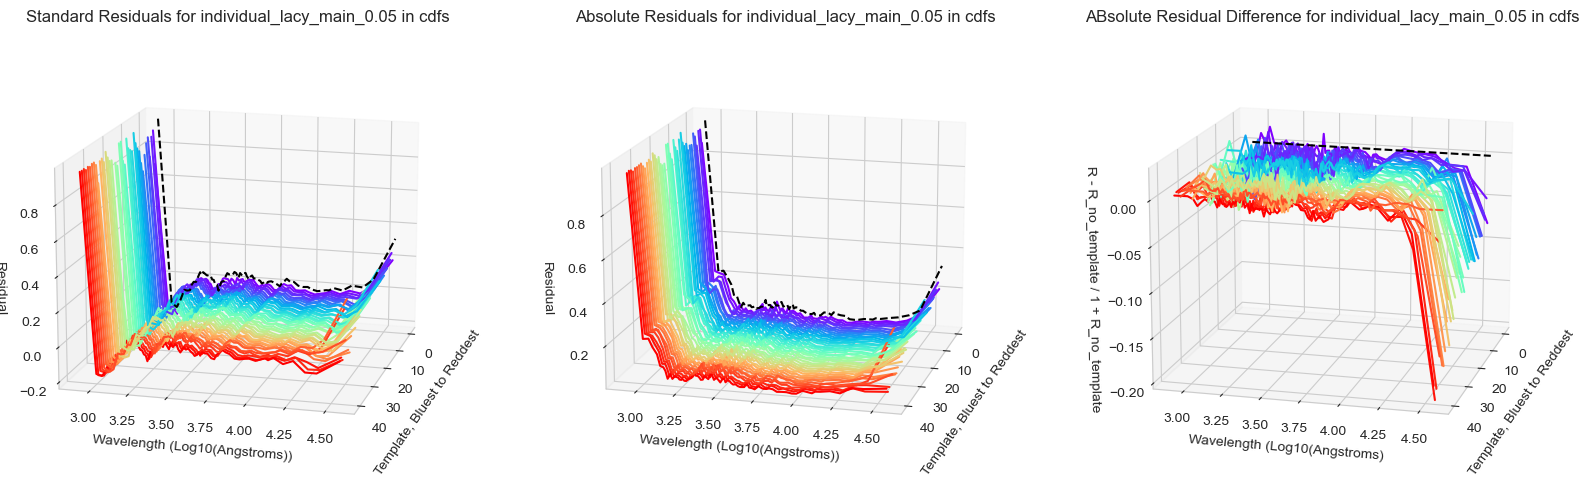

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 40), subplot_kw={'projection': '3d'})
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(true_to_BtR))]
for idx, temp_number in enumerate(true_to_BtR):
    # temp_number -= 1 # to get the correct template number
    ax1.plot([temp_number] * residual_df.shape[0], y_value(idx), z_value_copy(idx), label=f'{i}', color=colors[temp_number-1])
    ax2.plot([temp_number] * residual_df.shape[0], y_value(idx), z_value(idx), label=f'{i}', color=colors[temp_number-1])
    ax3.plot([temp_number] * residual_df.shape[0], y_value(idx), diff_value(idx), label=f'{i}', color=colors[temp_number-1])
ax1.plot([-1] * residual_df.shape[0], y_value(-1), z_value_copy(-1), label=f'{-1}', c='k', ls='--')
ax2.plot([-1] * residual_df.shape[0], y_value(-1), z_value(-1), label=f'{-1}', c='k', ls='--')
ax3.plot([-1] * residual_df.shape[0], y_value(-1), [0] * residual_df.shape[0], label=f'{-1}', c='k', ls='--')
ax1.set_xlabel('Template, Bluest to Reddest')
ax2.set_xlabel('Template, Bluest to Reddest')
ax3.set_xlabel('Template, Bluest to Reddest')
ax1.set_ylabel('Wavelength (Log10(Angstroms))')
ax2.set_ylabel('Wavelength (Log10(Angstroms))')
ax3.set_ylabel('Wavelength (Log10(Angstroms)')
ax1.set_zlabel('Residual')
ax2.set_zlabel('Residual')
ax3.set_zlabel('R - R_no_template / 1 + R_no_template')
ax1.view_init(elev=15., azim=15)
ax2.view_init(elev=15., azim=15)
ax3.view_init(elev=15., azim=15)
ax1.set_title(f'Standard Residuals for {test_title} in {field}')
ax2.set_title(f'Absolute Residuals for {test_title} in {field}')
ax3.set_title(f'ABsolute Residual Difference for {test_title} in {field}')

In [14]:
# picking out each template that is best in each bin
best_template_residual = []
for idx, temp_number in enumerate(true_to_BtR):
    best_template_residual.append(diff_value(idx))

best_template_residual = np.array(best_template_residual)
best_template_residual = np.transpose(best_template_residual)
best_template_residual_each = np.unique(np.argmin(best_template_residual, axis=1), return_counts=True)
best_template_df = pd.DataFrame(np.transpose(best_template_residual_each))
best_template_df.columns = ['Template', 'Count']
best_template_df.sort_values('Count', ascending=False, inplace=True)
best_template_df

,Template,Count
23,34,7
18,25,7
8,9,7
6,7,6
19,27,5
24,35,4
9,10,4
0,0,3
17,24,3
14,17,3


In [ ]:
# averaging the residuals
from scipy.stats import linregress

average_res = []
for idx, temp_number in enumerate(true_to_BtR):
    average_res.append(np.mean(diff_value(idx)))
    plt.scatter(temp_number, np.mean(diff_value(idx)), c=colors[temp_number-1])

#plt.plot([0, len(x)], [0, 0], c='k', ls='-')
x_df = pd.DataFrame({'x':true_to_BtR})
sim_reg = linregress(x_df['x'], average_res)
plt.plot(x_df, sim_reg.intercept + sim_reg.slope * x_df['x'], c='k', ls='--')

plt.xlabel('Template, Bluest to Reddest')
plt.ylabel('(R - R_no_template) / 1 + R_no_template')
plt.title(f'Average Residual Difference for {test_title} in {field}')

In [ ]:
# plotting above with nmad values
single_df = gs.load_key_data(output_location, field, test_title)

fig, ax = plt.subplots(1, 1, figsize=(12, 12), subplot_kw={'projection': '3d'})

for idx, temp_number in enumerate(true_to_BtR):
    ax.scatter(temp_number, single_df['nmad_val'][idx], np.mean(diff_value(idx)), c=colors[temp_number-1])

ax.set_xlabel('Template, Bluest to Reddest')
ax.set_ylabel('NMAD')
ax.set_zlabel('Average Residual Difference, (R - R_no_template) / 1 + R_no_template')
ax.set_title(f'Average Residual Difference for {test_title} in {field}')
ax.view_init(elev=15., azim=-45)

In [ ]:
# PCA of residuals to see which templates are the most similar in terms of fitting.
# first up, normalisation. I want to use the copy, as it has the negative values and therefore more variance.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

residual_df_copy = residual_df.filter(regex='^rc_') # we want the copy
residual_df_copy = residual_df_copy.drop(columns=['rc_-1']) # remove no template column
scaler = StandardScaler()
data_standardised = scaler.fit_transform(residual_df_copy)
residual_df_copy_standardised = pd.DataFrame(np.transpose(data_standardised))
residual_df_copy_standardised.describe()

In [ ]:
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
data_pca = pca.fit_transform(np.transpose(data_standardised))

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(np.transpose(data_standardised))
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(np.transpose(data_standardised))

#view cluster assignments for each observation
kmeans.labels_

In [ ]:
plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colours_list = []
for idx, template in enumerate(true_to_BtR):
    colours_list.append(colors[template-1])

for idx,colour in enumerate(colours_list):
    plt.text(data_pca[idx, 0], data_pca[idx, 1], f'{idx}', fontsize=12)
    if kmeans.labels_[idx] == 0:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {x[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
    elif kmeans.labels_[idx] == 1:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {x[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
    else:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {x[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
#plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f"Template Residuals in Principal Component Space with K-Clustering in {test_title}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")
total_explained_variance = np.sum(explained_variance)
print(f"Total explained variance: {total_explained_variance}")

In [ ]:
# best NMAD  for the test
best_nmad_df = pd.DataFrame(columns=['nmad', 'template', 'BtR Template'])
for idx, template in enumerate(true_to_BtR):
    data_list = pd.DataFrame({'nmad':[single_df['nmad_val'][idx]], 'template':single_df['agn_templates'][idx][1:-1], 'BtR Template':[template]})
    best_nmad_df = pd.concat([best_nmad_df, data_list])
best_nmad_df.sort_values(by='nmad', inplace=True)
best_nmad_df

## Chi 2 vs Nmad for each template

In [ ]:
test_title = 'individual_donley_main_0.05'
output_location = 'G:/honours/outputs'
field = 'cdfs'
single_df = gs.load_key_data(output_location, field, test_title)
id_key = 'donley'
use_galaxy_templates = True
template_key = 'atlas_rest'
z_step = 0.05
chi2_all = []
for template in single_df['agn_templates']:
    single_temp_df = gs.load_individual(output_location, field, test_title, id_key, template_key, template, use_galaxy_templates, z_step, 'a')
    chi2_all.append(single_temp_df['chi2'])

In [ ]:
def normalizer(array):
    new_array = np.zeros_like(array)
    for i in range(len(array)):
        if max(array[i]) == min(array[i]):
            new_array[i] = np.zeros_like(array[i])
        else:
            new_array[i] = (array[i] - min(array[i])) / (max(array[i]) - min(array[i]))
    return new_array

chi2_array = normalizer(np.transpose(np.array(chi2_all)))

best_fit = np.zeros((len(chi2_array), 3))
for fit in range(len(chi2_array)):
    min_indices = np.argmin(chi2_array[fit])
    best_fit[fit] = [chi2_array[fit, min_indices], single_df[(single_df['agn_templates'] == f'[{min_indices}]')]['nmad_val'].iloc[0], min_indices]

best_fit_df = pd.DataFrame(best_fit, columns=['chi2', 'nmad', 'template'])
best_fit_df.sort_values(by='nmad', inplace=True)
all_templates = np.round(best_fit_df['template'].unique(), 0).astype(int)
all_best_fit = pd.DataFrame(columns=['nmad', 'template', 'counts'])
for template in all_templates:
    counts = len(best_fit_df[best_fit_df['template'] == template])
    data_list = pd.DataFrame({'nmad':[best_fit_df[best_fit_df['template'] == template].iloc[0,1]], 'template':[template], 'counts':[counts]})
    all_best_fit = pd.concat([all_best_fit, data_list])
all_best_fit

In [ ]:
plt.scatter(best_fit_df['chi2'], best_fit_df['nmad'], c='k', alpha=0.5)
plt.xlabel('Chi2')
plt.ylabel('Nmad')
plt.title('Chi2 vs Nmad for each template')

In [ ]:
fig = plt.plot(figsize=(12, 6))

x_data = np.linspace(0, len(all_best_fit['template']) - 1, len(all_best_fit['template']), dtype=int)
sns.barplot(data=all_best_fit,x=x_data, y='counts')
plt.xlabel('Best fitting Templates to Worst')
plt.ylabel('Counts')
plt.title('Counts for each template')

## Outlier Fraction Plots

In [ ]:
test_title = 'individual_normal_0.05'
field = 'cdfs'
output_location = 'G:/honours/outputs'

# so similar to template_auto_reload, I need to open spec data and the individual data to produce a df to compare
id_key = 'normal' # normal, high or low
import global_settings as gs
id_key_dict = gs.get_id_dict(field)

#Setting up the main catalogue
main_cat = pd.read_csv(id_key_dict[id_key]) # get the catalogue for the id_key
main_cat.to_csv('inputs/eazy_reload.cat', index=False) # create a new catalogue, allows for change to be made in this cell

main = pd.read_csv('inputs/eazy_reload.cat', sep=" ", comment="#", header=None, skipinitialspace=True) # opening cut cat, and adjusting it
headers = pd.read_csv('inputs/eazy_reload.cat', sep=" ", header=None, nrows=1).iloc[0]
headers = headers[1:]
main.columns = headers
agn_per_dir = f'inputs/{field}_agn_frac.txt' # file with AGN fractions for each object, prepared in catalogue_prepare.ipynb
all_bayes = pd.read_csv(agn_per_dir, sep="\s+", comment='#')

has_fraction = 'bayes.agn.fracAGN' in main.columns
if not has_fraction:
    main = pd.merge(main, all_bayes, on='id', how='left') # AGN fraction for each object


In [ ]:
# opening each template and making a df
all_test_csv = glob.glob(f'{output_location}/{field}/{test_title}/induvidual_data_*.csv')
all_test_csv

In [ ]:
phot_redshift_df = pd.DataFrame()
for template in all_test_csv:
    template_no = template.split('_')[-2]
    template_df = pd.read_csv(template, usecols=['phot_redshift'])
    template_df.rename(columns={'phot_redshift':f'{template_no[1:-1]}'}, inplace=True)
    phot_redshift_df = pd.concat([phot_redshift_df, template_df], axis=1)

phot_redshift_df

In [ ]:
def rms(phot, spec, outlier=False):
    if len(phot) != len(spec):
        print('Lengths of the photometric and spectroscopic redshifts do not match')
        print(f'Phot: {len(phot)}, Spec: {len(spec)}')
        return
    phot = np.array(phot[spec > 0])
    spec = np.array(spec[spec > 0])
    diff = phot - spec
    diff = diff[~np.isnan(diff)]
    if outlier:
        diff = diff[abs(diff) < 0.15]
        return np.sqrt(np.mean(diff**2)), 1-(len(diff) / len(phot))
    else:
        return np.sqrt(np.mean(diff**2))

def nmad(phot, spec, outlier=False):
    if len(phot) != len(spec):
        print('Lengths of the photometric and spectroscopic redshifts do not match')
        print(f'Phot: {len(phot)}, Spec: {len(spec)}')
        return
    phot = np.array(phot[spec > 0])
    spec = np.array(spec[spec > 0])
    diff = (phot - spec) / (1 + spec)
    diff = diff[~np.isnan(diff)]
    if outlier:
        diff = diff[abs(diff) < 0.15]
        return 1.4826 * np.median(abs(diff - np.median(diff))), 1-(len(diff) / len(phot))
    else:
        return 1.4826 * np.median(abs(diff - np.median(diff)))

In [ ]:
all_templates = phot_redshift_df.columns
rms_df = pd.DataFrame()
for template in all_templates:
    rms_val_out, outlier_fraction = rms(phot_redshift_df[template], main['z_spec'], outlier=True)
    rms = rms(phot_redshift_df[template], main['z_spec'])
    nmad =
    data_list = pd.DataFrame({'template':[template], 'rms_out':[rms_val_out], 'rms':[rms], 'outlier_fraction':[outlier_fraction]})
    rms_df = pd.concat([rms_df, data_list])
rms_df

In [ ]:
# rms plotted against outlier fraction
plt.scatter(rms_df['rms'], rms_df['outlier_fraction'])
plt.xlabel('RMS')
plt.ylabel('Outlier Fraction')
plt.title('RMS vs Outlier Fraction for each template')